## Import files

In [425]:
import pandas as pd
import re



## Importing the txt file and split dates and messeges

In [426]:
f=open('WhatsApp Chat with EDIFICATION 4 (1).txt','r', encoding= 'utf-8')
data=f.read()
# print(data)

In [427]:
# pattern='\d{1,2}\/\d{1,2}\/\d{2,4},\s \d{1,2}:\d{2}\s-\s'
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
message=re.split(pattern,data)[1:]
# print(messeges)

In [428]:
dates=re.findall(pattern,data)
# dates

## Creating pandas dataframe

In [429]:
df=pd.DataFrame({"user_message":message,"message_date":dates})
df["message_date"]=pd.to_datetime(df["message_date"], format='%m/%d/%y, %H:%M - ')
df.rename(columns={'message_date' : 'date'},inplace=True)
df.head()

,user_message,date
0,"You created group ""EDIFICATION 4""\n",2021-07-02 19:26:00
1,😈~Ken Kaneki~😈: Itna sannata kaiko re\n,2022-08-28 19:36:00
2,Dipayan: Match dekho...\n,2022-08-28 19:44:00
3,😈~Ken Kaneki~😈: Phone dek6i\n,2022-08-28 19:52:00
4,😈~Ken Kaneki~😈: 🙂\n,2022-08-28 19:52:00


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_message  11333 non-null  object        
 1   date          11333 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 177.2+ KB


In [431]:
# df["user_message"]=df["user_message"].astype('string') #own change

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_message  11333 non-null  object        
 1   date          11333 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 177.2+ KB


In [433]:
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['users']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\indra\AppData\Local\Temp\ipykernel_7916\3234378266.py:4: SyntaxWarning: invalid escape sequence '\w'
  entry=re.split('([\w\W]+?):\s',message)


In [434]:
df

,date,users,message
0,2021-07-02 19:26:00,group_notification,"You created group ""EDIFICATION 4""\n"
1,2022-08-28 19:36:00,😈~Ken Kaneki~😈,Itna sannata kaiko re\n
2,2022-08-28 19:44:00,Dipayan,Match dekho...\n
3,2022-08-28 19:52:00,😈~Ken Kaneki~😈,Phone dek6i\n
4,2022-08-28 19:52:00,😈~Ken Kaneki~😈,🙂\n
...,...,...,...
11328,2024-02-22 11:26:00,Tuhin Da Spoken,Khub ekta vlo na\n
11329,2024-02-22 11:37:00,Dam 2,Desert khawar por rutii valo lagbeo naa\n
11330,2024-02-22 11:37:00,Dam 2,😶‍🌫😶‍🌫\n
11331,2024-02-22 11:39:00,Avijit Sir,😁\n


## Extract from dataframe

In [435]:
df["year"]=df["date"].dt.year

In [436]:
df["month"]=df["date"].dt.month_name()

In [437]:
df["day"]=df["date"].dt.day

In [438]:
df["hour"]=df["date"].dt.hour

In [439]:
df["minute"]=df["date"].dt.minute

In [440]:
df.head()

,date,users,message,year,month,day,hour,minute
0,2021-07-02 19:26:00,group_notification,"You created group ""EDIFICATION 4""\n",2021,July,2,19,26
1,2022-08-28 19:36:00,😈~Ken Kaneki~😈,Itna sannata kaiko re\n,2022,August,28,19,36
2,2022-08-28 19:44:00,Dipayan,Match dekho...\n,2022,August,28,19,44
3,2022-08-28 19:52:00,😈~Ken Kaneki~😈,Phone dek6i\n,2022,August,28,19,52
4,2022-08-28 19:52:00,😈~Ken Kaneki~😈,🙂\n,2022,August,28,19,52


## Analysis part

In [441]:
df[df['users']=='Agradip'].shape

(45, 8)

In [442]:
words=[]

for message in df["message"]:
    words.extend(message.split())

In [443]:
len(words)

41500

In [444]:
new=df[df['message']=="<Media omitted>\n"]

In [445]:
new

,date,users,message,year,month,day,hour,minute
127,2022-08-29 11:04:00,Agradip,<Media omitted>\n,2022,August,29,11,4
128,2022-08-29 14:02:00,Dam 2,<Media omitted>\n,2022,August,29,14,2
199,2022-08-31 23:26:00,😈~Ken Kaneki~😈,<Media omitted>\n,2022,August,31,23,26
206,2022-09-01 13:53:00,😈~Ken Kaneki~😈,<Media omitted>\n,2022,September,1,13,53
209,2022-09-01 15:01:00,😈~Ken Kaneki~😈,<Media omitted>\n,2022,September,1,15,1
...,...,...,...,...,...,...,...,...
11257,2024-01-23 16:59:00,😈~Ken Kaneki~😈,<Media omitted>\n,2024,January,23,16,59
11277,2024-01-25 12:13:00,😈~Ken Kaneki~😈,<Media omitted>\n,2024,January,25,12,13
11282,2024-02-05 21:00:00,Avijit Sir,<Media omitted>\n,2024,February,5,21,0
11289,2024-02-05 21:01:00,😈~Ken Kaneki~😈,<Media omitted>\n,2024,February,5,21,1


In [446]:
links=[]
for message in df['message']:
      url_pattern = r'https?://\S+|www\.\S+' # Regular expression pattern to match URLs
      urls = re.findall(url_pattern,message) # Extract URLs from the text using the regular expression
      links.extend(urls) # Print the extracted URLs
print(links)


['https://www.google.com/search?q=india+vs&oq=Indiavs&aqs=chrome.1.69i57j0i10i512l2j0i512j0i10i512j0i20i263i512j0i10i512l3.7260j1j4&client=ms-android-transsion&sourceid=chrome-mobile&ie=UTF-8#sie=m;/g/11t7m45hy_;5;/m/02k52y;dt;fp;1;;;', 'https://fb.watch/fn15xINsvW/', 'https://chat.whatsapp.com/Jk5QqNrlAiECbj1GdjAK4b', 'https://youtu.be/L_a4kF4ypOE', 'https://www.facebook.com/rjpriyanka.siliguri/videos/647510623276450/?flite=scwspnss&mibextid=rDjTIhMUJ2rTaH6J', 'https://youtu.be/_w3OBiOwv_Y.', 'https://youtu.be/LWB5CPnR-cA', 'https://youtu.be/uHgvAaha3WQ', 'https://gpay.app.goo.gl/QfB4La', 'https://gpay.app.goo.gl/AmajX9', 'https://gpay.app.goo.gl/QE3cJv', 'https://chat.whatsapp.com/BdzOwAcCptBKBW4nDfoAmI', 'https://gpay.app.goo.gl/oc3cw1', 'https://www.instagram.com/p/Cl_bGesvkwj/?igshid=YmMyMTA2M2Y=', 'https://www.instagram.com/reel/CmEg-MRuX5s/?igshid=YmMyMTA2M2Y=', 'https://www.instagram.com/p/CmJRLdBP8Lk/?igshid=YmMyMTA2M2Y=', 'https://www.instagram.com/p/Cmaw6NDotuQ/?igshid=Yzg5M

In [447]:

x=df['users'].value_counts().head()

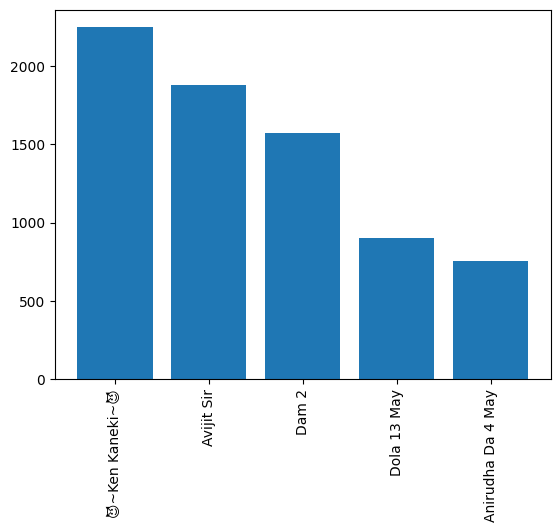

In [448]:
import matplotlib.pyplot as plt
name=x.index
count=x.values
plt.bar(name,count)    
plt.xticks(rotation="vertical")
plt.show()

In [449]:
round(((df['users'].value_counts())/df.shape[0])*100,2).reset_index().rename(columns={'users':'name','count':'percent'})

,name,percent
0,😈~Ken Kaneki~😈,19.83
1,Avijit Sir,16.58
2,Dam 2,13.84
3,Dola 13 May,7.98
4,Anirudha Da 4 May,6.67
5,Rupu,6.27
6,Dipayan,5.96
7,Pallabi Spoken,4.01
8,Ritwika 18 May,3.34
9,Tuhina 21 Aug,2.90


In [450]:
# words=[]
# for message in df['message']:
#     words.extend(message.split())
# # print(words)

In [451]:
# from collections import Counter
# pd.DataFrame(Counter(words).most_common(20))

In [452]:
# in the previous code we have to omit 
# 1. group messages
# 2. media ommited message
# 3. stop words

In [453]:
temp=df[df['users']!='group_notification']
temp=temp[temp['message']!='<Media omitted>\n'	]
temp

,date,users,message,year,month,day,hour,minute
1,2022-08-28 19:36:00,😈~Ken Kaneki~😈,Itna sannata kaiko re\n,2022,August,28,19,36
2,2022-08-28 19:44:00,Dipayan,Match dekho...\n,2022,August,28,19,44
3,2022-08-28 19:52:00,😈~Ken Kaneki~😈,Phone dek6i\n,2022,August,28,19,52
4,2022-08-28 19:52:00,😈~Ken Kaneki~😈,🙂\n,2022,August,28,19,52
5,2022-08-28 19:53:00,Dipayan,🙂cos2\n,2022,August,28,19,53
...,...,...,...,...,...,...,...,...
11328,2024-02-22 11:26:00,Tuhin Da Spoken,Khub ekta vlo na\n,2024,February,22,11,26
11329,2024-02-22 11:37:00,Dam 2,Desert khawar por rutii valo lagbeo naa\n,2024,February,22,11,37
11330,2024-02-22 11:37:00,Dam 2,😶‍🌫😶‍🌫\n,2024,February,22,11,37
11331,2024-02-22 11:39:00,Avijit Sir,😁\n,2024,February,22,11,39


In [454]:
f=open('bengali_stop_words.txt','r')
stop_words=f.read()
# print(stop_words)

In [455]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    

In [456]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20)) 

,0,1
0,sir,514
1,🙂,399
2,kal,160
3,tui,138
4,sobai,136
5,happy,130
6,kotha,113
7,sob,113
8,you,103
9,@918777095967,101


In [457]:
# import emoji
# emojis=[]
# for message in df['message']:
#     emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en ']])


In [458]:
df['month_num']=df['date'].dt.month

In [459]:
timeline=df.groupby(['year','month','month_num']).count()['message'].reset_index()

In [460]:
timeline

,year,month,month_num,message
0,2021,July,7,1
1,2022,August,8,199
2,2022,December,12,1358
3,2022,November,11,1106
4,2022,October,10,905
5,2022,September,9,643
6,2023,April,4,826
7,2023,August,8,356
8,2023,December,12,118
9,2023,February,2,541


In [461]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+'-'+ str(timeline['year'][i]))

In [462]:
timeline['time']=time

In [463]:
timeline


,year,month,month_num,message,time
0,2021,July,7,1,July-2021
1,2022,August,8,199,August-2022
2,2022,December,12,1358,December-2022
3,2022,November,11,1106,November-2022
4,2022,October,10,905,October-2022
5,2022,September,9,643,September-2022
6,2023,April,4,826,April-2023
7,2023,August,8,356,August-2023
8,2023,December,12,118,December-2023
9,2023,February,2,541,February-2023


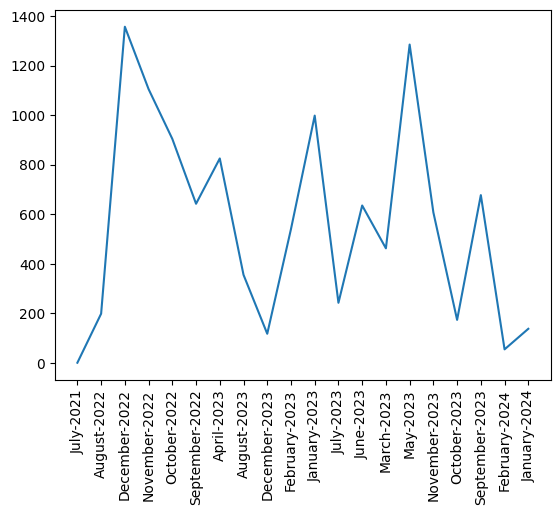

In [464]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation="vertical")
plt.show()

In [465]:
df['specific_date']=df['date'].dt.date

In [466]:
daily_timeline=df.groupby('specific_date').count()['message'].reset_index()

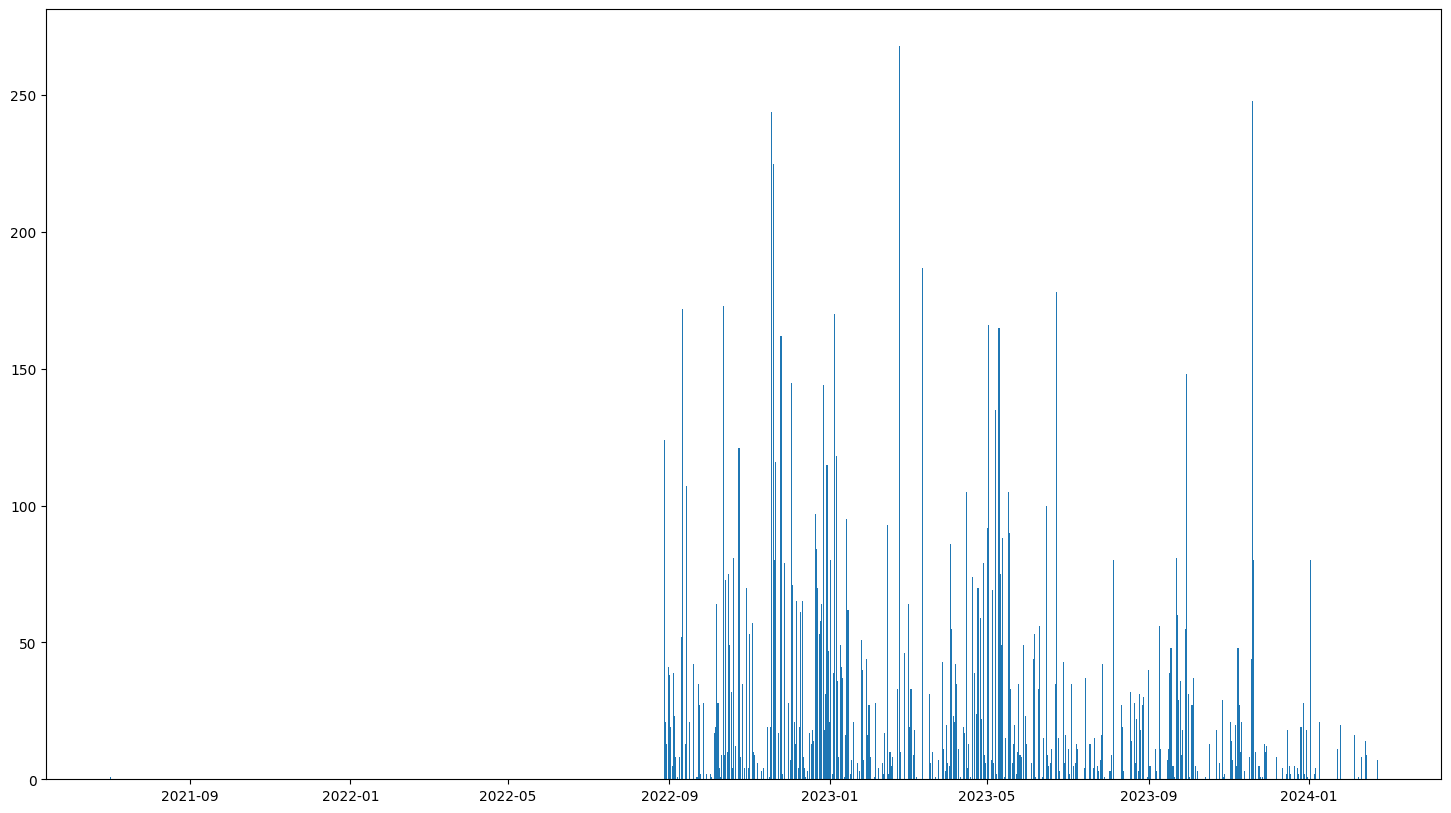

In [467]:
plt.figure(figsize=(18,10))
plt.bar(daily_timeline['specific_date'],daily_timeline['message'])
plt.show()

In [468]:
df['day_name']=df['date'].dt.day_name()

In [469]:
df

,date,users,message,year,month,day,hour,minute,month_num,specific_date,day_name
0,2021-07-02 19:26:00,group_notification,"You created group ""EDIFICATION 4""\n",2021,July,2,19,26,7,2021-07-02,Friday
1,2022-08-28 19:36:00,😈~Ken Kaneki~😈,Itna sannata kaiko re\n,2022,August,28,19,36,8,2022-08-28,Sunday
2,2022-08-28 19:44:00,Dipayan,Match dekho...\n,2022,August,28,19,44,8,2022-08-28,Sunday
3,2022-08-28 19:52:00,😈~Ken Kaneki~😈,Phone dek6i\n,2022,August,28,19,52,8,2022-08-28,Sunday
4,2022-08-28 19:52:00,😈~Ken Kaneki~😈,🙂\n,2022,August,28,19,52,8,2022-08-28,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
11328,2024-02-22 11:26:00,Tuhin Da Spoken,Khub ekta vlo na\n,2024,February,22,11,26,2,2024-02-22,Thursday
11329,2024-02-22 11:37:00,Dam 2,Desert khawar por rutii valo lagbeo naa\n,2024,February,22,11,37,2,2024-02-22,Thursday
11330,2024-02-22 11:37:00,Dam 2,😶‍🌫😶‍🌫\n,2024,February,22,11,37,2,2024-02-22,Thursday
11331,2024-02-22 11:39:00,Avijit Sir,😁\n,2024,February,22,11,39,2,2024-02-22,Thursday


In [470]:
df["day_name"].value_counts()

day_name
Friday       2048
Saturday     1846
Thursday     1674
Monday       1664
Sunday       1604
Wednesday    1329
Tuesday      1168
Name: count, dtype: int64

In [471]:
df["day_name"].value_counts().index

Index(['Friday', 'Saturday', 'Thursday', 'Monday', 'Sunday', 'Wednesday',
       'Tuesday'],
      dtype='object', name='day_name')

In [472]:
df["day_name"].value_counts().values

array([2048, 1846, 1674, 1664, 1604, 1329, 1168], dtype=int64)

In [473]:
df[['day_name','hour']]['hour']

0        19
1        19
2        19
3        19
4        19
         ..
11328    11
11329    11
11330    11
11331    11
11332    11
Name: hour, Length: 11333, dtype: int32

In [474]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour==23:
        period.append(str(hour)+"-"+str('00'))
    elif hour==0:
        period.append(str(00)+"-"+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))


In [475]:
df['period']=period

In [476]:
df.sample(5)

,date,users,message,year,month,day,hour,minute,month_num,specific_date,day_name,period
2709,2022-11-25 20:39:00,Avijit Sir,Thursday\n,2022,November,25,20,39,11,2022-11-25,Friday,20-21
1003,2022-10-12 08:55:00,Dola 13 May,Abr treat dibi taholei hbe\n,2022,October,12,8,55,10,2022-10-12,Wednesday,8-9
565,2022-09-13 20:39:00,Supratim 12 Oct,<Media omitted>\n,2022,September,13,20,39,9,2022-09-13,Tuesday,20-21
1403,2022-10-18 23:47:00,Dam 2,Letter diye dakati korbo\nParle atkao🔥🔥🔥\n,2022,October,18,23,47,10,2022-10-18,Tuesday,23-00
6583,2023-04-15 11:06:00,Dola 13 May,<Media omitted>\n,2023,April,15,11,6,4,2023-04-15,Saturday,11-12


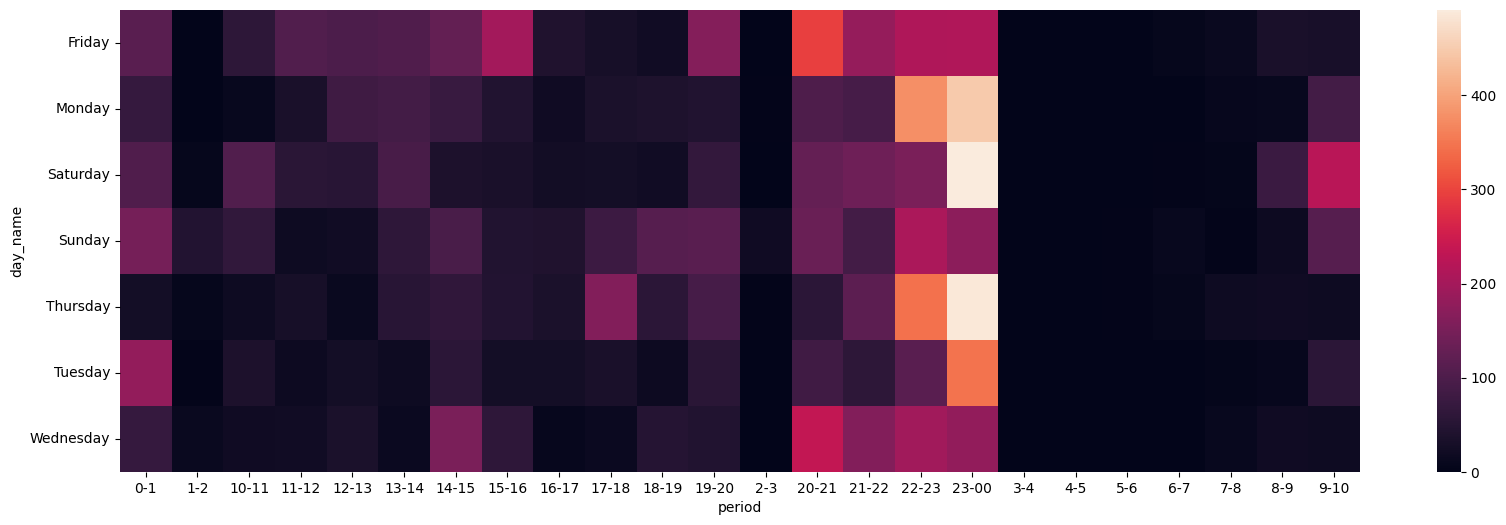

In [477]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc="count").fillna(0))
plt.show()